# 损失函数与反向传播

**损失函数**(Loss Function)的作用：1.计算实际输出与期望目标的差距 2.为模型更新输出提供一定的依据(反向传播),依据grad对参数进行优化   Loss越小越好

In [20]:
#导入库
import torch,torchvision
from torch import nn
from torch.nn import L1Loss, MSELoss, Conv2d, MaxPool2d, Flatten, Linear
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader

In [5]:
#L1Loss损失函数
inputs = torch.tensor([1, 2, 3], dtype = torch.float32)
targets = torch.tensor([1, 2, 5], dtype = torch.float32)
inputs = torch.reshape(inputs, (1, 1, 1, 3))
targets = torch.reshape(targets, (1, 1, 1, 3))

#reduction参数默认为mean，即平均误差；设置为‘sum’，计算整体误差
l1_loss = L1Loss(reduction = 'sum')
l1_result = l1_loss(inputs, targets)
print(l1_result)

tensor(2.)


In [8]:
#均方误差函数
mse_loss = MSELoss()
mse_result = mse_loss(inputs, targets)
print(mse_result)

tensor(1.3333)


## 交叉熵函数(CrossEntropyLoss) 用于多分类任务中评估损失

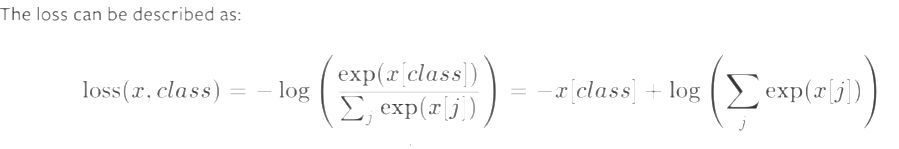

例子：交叉熵函数多用于多分类任务中评估损失

计算过程：

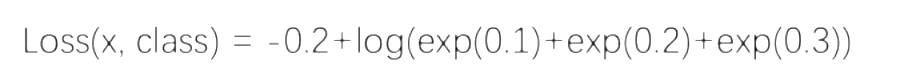

In [12]:
#交叉熵函数(CrossEntropyLoss)
x = torch.tensor([0.1, 0.2, 0.3])
y = torch.tensor([1])
x = torch.reshape(x, (1, 3))
cross_loss = nn.CrossEntropyLoss()
cross_result = cross_loss(x, y)
print(cross_result)

tensor(1.1019)


In [23]:
#将损失函数引入神经网络模型
dataset = torchvision.datasets.CIFAR10("dataset_CIFAR10", train= False, download= True, transform= torchvision.transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size= 1)

class Neural(nn.Module):
    def __init__(self):
        super(Neural, self).__init__()
        self.model1 = nn.Sequential(
            Conv2d(3, 32, 5, padding= 2),
            MaxPool2d(2),
            Conv2d(32, 32, 5, padding= 2),
            MaxPool2d(2),
            Conv2d(32, 64, 5, padding= 2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024, 64),
            Linear(64, 10)
        )
    
    def forward(self, x):
        x = self.model1(x)
        return x

loss = nn.CrossEntropyLoss()  
neural = Neural()
for data in dataloader:
    imgs, targets = data 
    outputs = neural(imgs)
    # print(outputs)
    # print(targets)
    result_loss = loss(outputs, targets)
    # print(result_loss)
    #反向传播损失
    result_loss.backward()
    print('ok')

Files already downloaded and verified
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok